In [ ]:
!pip install -U transformers bitsandbytes accelerate peft datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing

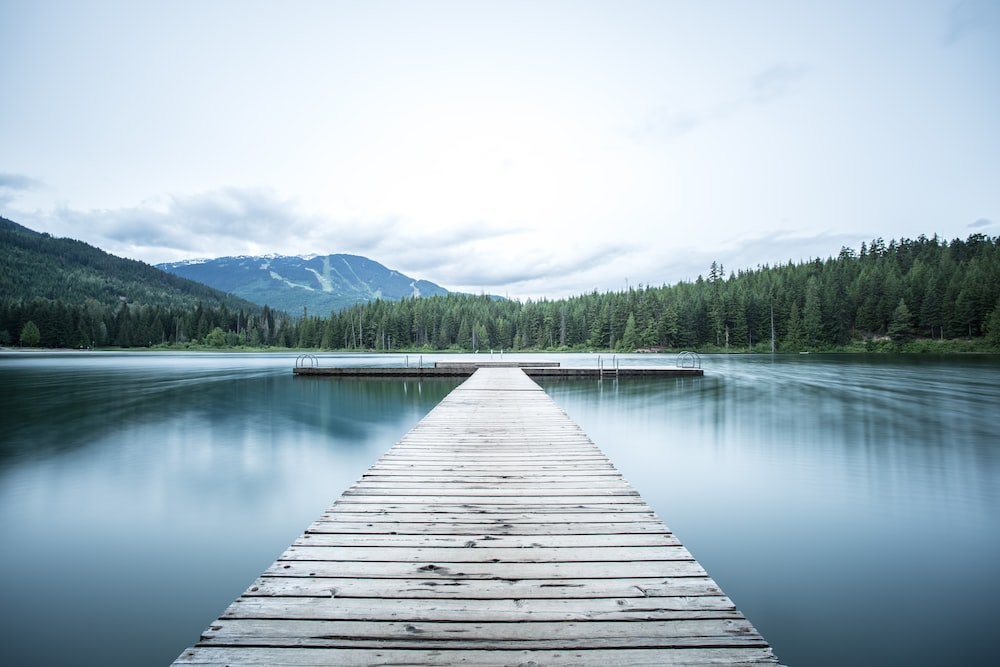

In [ ]:
import requests
from PIL import Image

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
from transformers import LlavaForConditionalGeneration, AutoProcessor, AutoModelForPreTraining
import torch
from transformers import BitsAndBytesConfig

model_id = "llava-hf/llava-1.5-7b-hf"

device = "cuda" if torch.cuda.is_available() else "cpu"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = LlavaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    quantization_config=bnb_config,
    device_map="auto",
).to(device)

processor = AutoProcessor.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

In [ ]:
conversation = [
    {
      "role": "user",
      "content": [
          {"type": "text", "text": "Describe briefly"},
          {"type": "image"},
        ],
    },
]

prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

In [ ]:
inputs = processor(images=image, text=prompt, return_tensors='pt').to(device)

output = model.generate(**inputs, max_new_tokens=200)

print(processor.decode(output[0], skip_special_tokens=False))


Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


<s> USER: <image> 
Describe briefly ASSISTANT: The image features a pier extending over a body of water, with a mountain in the background. The pier is made of wood and has a bench on it, providing a place for people to sit and enjoy the view. The scene is serene and picturesque, with the mountain and water creating a beautiful natural setting.</s>


In [ ]:
import datasets
from sklearn.model_selection import train_test_split

ds = datasets.load_dataset("Naveengo/flickr8k", split='train')

README.md:   0%|          | 0.00/539 [00:00<?, ?B/s]

(…)-00000-of-00003-942e07a3ce94e325.parquet:   0%|          | 0.00/373M [00:00<?, ?B/s]

(…)-00001-of-00003-5f4071f26210e241.parquet:   0%|          | 0.00/363M [00:00<?, ?B/s]

(…)-00002-of-00003-c7bf5ccc354b5dd7.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8091 [00:00<?, ? examples/s]

In [ ]:
prompt = "Describe briefly"

def format_data(sample):
    return {"messages": [
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "image"},
                        {
                            "type": "text",
                            "text": prompt,
                        }
                    ],
                },
                {
                    "role": "assistant",
                    "content": [{"type": "text", "text": sample["text"]}],
                },
            ],
            "images": sample["image"],
            }

In [ ]:
dataset = [format_data(sample) for sample in ds]

dataset[0]["messages"]

[{'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text', 'text': 'Describe briefly'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': 'A child in a pink dress is climbing up a set of stairs in an entry way .'}]}]

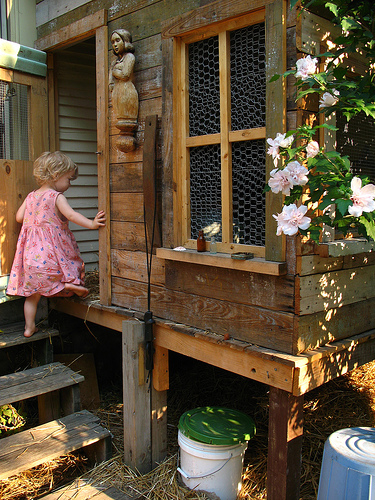

In [ ]:
dataset[0]["images"]

In [ ]:
print(processor.decode(output[0], skip_special_tokens=False))

<s> USER: <image> 
Describe briefly ASSISTANT: The image features a pier extending over a body of water, with a mountain in the background. The pier is made of wood and has a bench on it, providing a place for people to sit and enjoy the view. The scene is serene and picturesque, with the mountain and water creating a beautiful natural setting.</s>


In [ ]:
text = processor.apply_chat_template(
    dataset[0]["messages"], tokenize=False, add_generation_prompt=False
)
text

'USER: <image>\nDescribe briefly ASSISTANT: A child in a pink dress is climbing up a set of stairs in an entry way . '

In [ ]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()

model = prepare_model_for_kbit_training(model)

In [ ]:
from peft import LoraConfig, get_peft_model

peft_config = LoraConfig(
        lora_alpha=32,
        lora_dropout=0.05,
        r=16,
        bias="none",
        target_modules=["q_proj", "v_proj"],
        task_type="CAUSAL_LM",
)

model = get_peft_model(model, peft_config)

In [ ]:
model.print_trainable_parameters()

trainable params: 9,961,472 || all params: 7,073,388,544 || trainable%: 0.1408


In [ ]:
def collate_fn(examples):
    texts = [processor.apply_chat_template(example["messages"], tokenize=False) for example in examples]
    images = [example["images"] for example in examples]

    processor.tokenizer.add_eos_token = True
    batch = processor(text=texts, images=images, return_tensors="pt", padding=True)
    labels = batch["input_ids"].clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100  
    image_token_id = processor.tokenizer.convert_tokens_to_ids(processor.image_token)
    labels[labels == image_token_id] = -100
    batch["labels"] = labels

    return batch

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",  # Kayıt edilecek dizin
    learning_rate=2e-4,  # Öğrenme oranı
    per_device_train_batch_size=4,  # Train batch size
    gradient_accumulation_steps=8,
    num_train_epochs=1,  # Epoch sayısı
    max_steps=50,  # Toplam adım sayısı
    remove_unused_columns=False,  # Multimodal veri seti için önemli
    logging_steps=1,  # Log sıklığı
    fp16=True,
    push_to_hub=False,
    optim="paged_adamw_8bit",
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    train_dataset=dataset,
)

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:92: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.c

Step,Training Loss
1,5.914200
2,5.433400
3,4.941900
4,4.566100
5,4.390100
6,3.784700
7,3.432700
8,2.983000
9,2.658400
10,2.360000


TrainOutput(global_step=50, training_loss=1.8176554775238036, metrics={'train_runtime': 3079.7023, 'train_samples_per_second': 0.52, 'train_steps_per_second': 0.016, 'total_flos': 2509089181360128.0, 'train_loss': 1.8176554775238036, 'epoch': 0.1977261492832427})

In [ ]:
trainer.save_model("./new_model")

In [ ]:
from huggingface_hub import login

login(HF_TOKEN)

trainer.push_to_hub("lava-ft")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/39.9M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

events.out.tfevents.1728551457.26d5e9896b7b.311.0:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/beladrheinz/results/commit/d57872d16db8b2880d009ed7b3df8b4e86c727d3', commit_message='lava-ft', commit_description='', oid='d57872d16db8b2880d009ed7b3df8b4e86c727d3', pr_url=None, pr_revision=None, pr_num=None)